# **Libraries**

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression ,Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings("ignore")

# **Load Data**

In [23]:
data = pd.read_csv("/content/train.csv")

In [24]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [25]:
data.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [26]:
data.shape


(1460, 81)

In [27]:
data.dtypes


,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [28]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [29]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = data.select_dtypes(exclude=['float64', 'int64']).columns

for col in categorical_cols:
    if col not in numeric_cols:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))


In [30]:
data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


In [31]:
print(f"skewness:{data['SalePrice'].skew()}")


skewness:1.8828757597682129


In [32]:
data['SalePrice'] = np.log(data['SalePrice'])


In [33]:
print(f"skewness:{data['SalePrice'].skew()}")


skewness:0.12133506220520406


In [34]:
correlations = data.corr()['SalePrice'].drop('SalePrice')
sorted_correlations = correlations.sort_values(ascending=False)

print("Top features with highest correlation coefficients with SalePrice:")
for col in sorted_correlations.index:
    correlation_value = sorted_correlations[col]
    print(f"{col}: {correlation_value}")


Top features with highest correlation coefficients with SalePrice:
OverallQual: 0.8171844179216803
GrLivArea: 0.7009266525441309
GarageCars: 0.6806248074360484
GarageArea: 0.6508875559020071
TotalBsmtSF: 0.612133975369786
1stFlrSF: 0.5969810450343734
FullBath: 0.5947705420075331
YearBuilt: 0.5865702403842264
YearRemodAdd: 0.565607832591179
GarageYrBlt: 0.5410728625958745
TotRmsAbvGrd: 0.5344222037231263
Fireplaces: 0.48944942759848536
MasVnrArea: 0.43080852419510907
Foundation: 0.41208269022382804
BsmtFinSF1: 0.372023073567088
LotFrontage: 0.355878470385983
CentralAir: 0.35160018359252426
WoodDeckSF: 0.3341350739575106
OpenPorchSF: 0.3210529720197675
2ndFlrSF: 0.3192999843472049
HalfBath: 0.31398224991514884
PavedDrive: 0.30468760355691293
Electrical: 0.29425809651795193
LotArea: 0.25731989235273783
SaleCondition: 0.24881916417081745
BsmtFullBath: 0.23622410882434952
BsmtUnfSF: 0.22198505352520947
HouseStyle: 0.2147166507595774
BedroomAbvGr: 0.209043682126922
Neighborhood: 0.2016845788

In [35]:
columns =  ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath'
            ,'TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1',
            'Foundation','WoodDeckSF','2ndFlrSF','OpenPorchSF','HalfBath'
            ,'CentralAir','PavedDrive','Electrical','LotArea','SaleCondition','BsmtFullBath',
            'BsmtUnfSF','HouseStyle','BedroomAbvGr','Neighborhood','SalePrice']
data = data[columns]


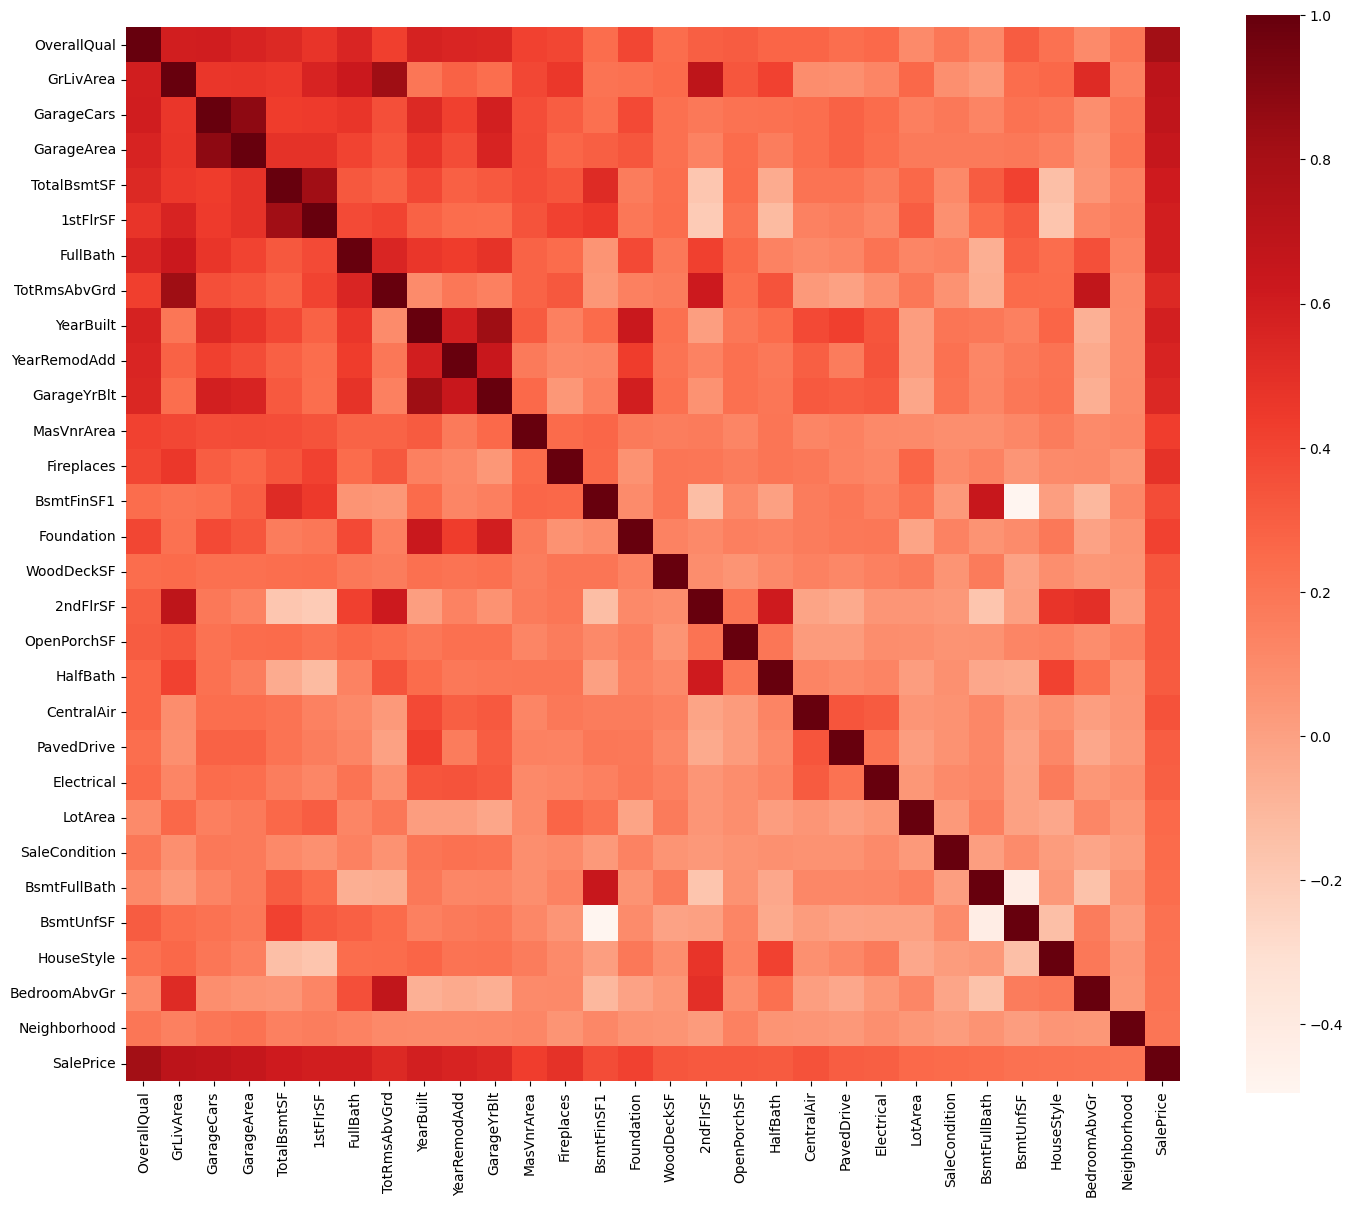

In [36]:
plt.figure(figsize = (17,14))
sns.heatmap(data[columns].corr(), cmap='Reds', square = True)
plt.show()


In [37]:
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (data['SalePrice'] < lower_bound) | (data['SalePrice'] > upper_bound)


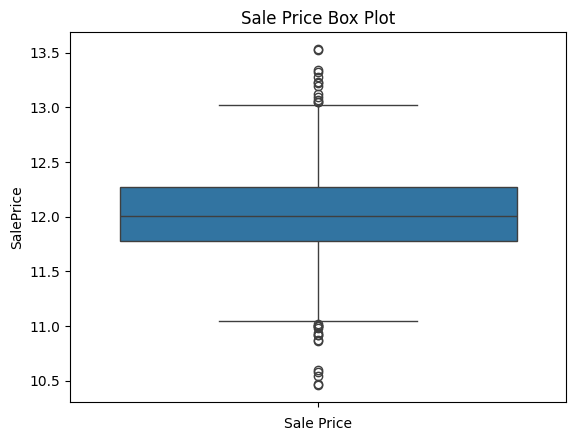

In [38]:
sns.boxplot(data['SalePrice'])
plt.title('Sale Price Box Plot')
plt.xlabel('Sale Price')
plt.show()


In [39]:
outliers_mask = (data['SalePrice'] < lower_bound) | (data['SalePrice'] > upper_bound)
outliers_data = data[outliers_mask]
print(f'Number of outliers: {len(outliers_data)}')


Number of outliers: 28


In [40]:
clean_data = data[~outliers_mask]
num_outliers_removed = len(data) - len(clean_data)
print(f'Number of outliers removed: {num_outliers_removed}')


Number of outliers removed: 28


In [41]:
min_price = clean_data['SalePrice'].min()
max_price = clean_data['SalePrice'].max()

print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")


Minimum Price: 11.041048081342682
Maximum Price: 13.021326833226556


In [42]:
clean_data.isnull().sum()

,0
OverallQual,0
GrLivArea,0
GarageCars,0
GarageArea,0
TotalBsmtSF,0
1stFlrSF,0
FullBath,0
TotRmsAbvGrd,0
YearBuilt,0
YearRemodAdd,0


In [43]:
clean_data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean(),inplace = True)
clean_data['MasVnrArea'].fillna(data['MasVnrArea'].mean(),inplace = True)

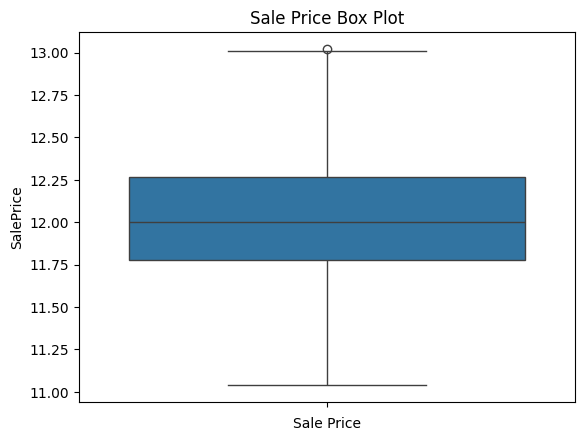

In [44]:
sns.boxplot(clean_data['SalePrice'])
plt.title('Sale Price Box Plot')
plt.xlabel('Sale Price')
plt.show()


In [45]:
testdata = pd.read_csv("/content/test.csv")

In [46]:
testdata


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [47]:
testcolumns = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath'
            ,'TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1',
            'Foundation','WoodDeckSF','2ndFlrSF','OpenPorchSF','HalfBath'
            ,'CentralAir','PavedDrive','Electrical','LotArea','SaleCondition','BsmtFullBath',
            'BsmtUnfSF','HouseStyle','BedroomAbvGr','Neighborhood']
testdata = testdata[testcolumns]


In [48]:
testdata.isnull().sum()


,0
OverallQual,0
GrLivArea,0
GarageCars,1
GarageArea,1
TotalBsmtSF,1
1stFlrSF,0
FullBath,0
TotRmsAbvGrd,0
YearBuilt,0
YearRemodAdd,0


In [49]:
testdata['GarageCars'].fillna(testdata['GarageCars'].mean(),inplace = True)
testdata['GarageArea'].fillna(testdata['GarageArea'].mean(),inplace = True)
testdata['TotalBsmtSF'].fillna(testdata['TotalBsmtSF'].mean(),inplace = True)
testdata['BsmtFullBath'].fillna(testdata['BsmtFullBath'].mean(),inplace = True)
testdata['BsmtUnfSF'].fillna(testdata['BsmtUnfSF'].mean(),inplace = True)
testdata['GarageYrBlt'].fillna(testdata['GarageYrBlt'].mean(),inplace = True)
testdata['MasVnrArea'].fillna(testdata['MasVnrArea'].mean(),inplace = True)
testdata['BsmtFinSF1'].fillna(testdata['BsmtFinSF1'].mean(),inplace = True)


In [50]:
test_numeric_cols = testdata.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns:", test_numeric_cols)
test_categorical_cols = testdata.select_dtypes(exclude=['float64', 'int64']).columns
print("Categorical columns:", test_categorical_cols)


Numeric columns: Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF',
       '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath',
       'BsmtUnfSF', 'BedroomAbvGr'],
      dtype='object')
Categorical columns: Index(['Foundation', 'CentralAir', 'PavedDrive', 'Electrical', 'SaleCondition',
       'HouseStyle', 'Neighborhood'],
      dtype='object')


In [51]:
testdata_encoded = pd.DataFrame()
for col in test_categorical_cols:
    le = LabelEncoder()
    testdata_encoded[col] = le.fit_transform(testdata[col].astype(str))

testdata_encoded[test_numeric_cols] = testdata[test_numeric_cols]
testdata_encoded = testdata_encoded[testcolumns]


In [52]:
testdata_encoded

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,CentralAir,PavedDrive,Electrical,LotArea,SaleCondition,BsmtFullBath,BsmtUnfSF,HouseStyle,BedroomAbvGr,Neighborhood
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,...,1,2,3,11622,4,0.0,270.0,2,2,12
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,...,1,2,3,14267,4,0.0,406.0,2,3,12
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,...,1,2,3,13830,4,0.0,137.0,4,3,8
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,...,1,2,3,9978,4,0.0,324.0,4,3,8
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,...,1,2,3,5005,4,0.0,1017.0,2,2,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,0.0,0.0,546.0,546,1,5,1970,1970,...,1,2,3,1936,4,0.0,546.0,4,3,10
1455,4,1092,1.0,286.0,546.0,546,1,6,1970,1970,...,1,2,3,1894,0,0.0,294.0,4,3,10
1456,5,1224,2.0,576.0,1224.0,1224,1,7,1960,1996,...,1,2,3,20000,0,1.0,0.0,2,4,11
1457,5,970,0.0,0.0,912.0,970,1,6,1992,1992,...,1,2,3,10441,4,0.0,575.0,5,3,11


In [53]:
clean_data.isnull().sum()


,0
OverallQual,0
GrLivArea,0
GarageCars,0
GarageArea,0
TotalBsmtSF,0
1stFlrSF,0
FullBath,0
TotRmsAbvGrd,0
YearBuilt,0
YearRemodAdd,0


In [54]:
X = clean_data.drop(['SalePrice'], axis=1)
y = clean_data['SalePrice']


In [56]:
scaler = StandardScaler()
std_X = scaler.fit_transform(X)
std_testdata = scaler.transform(testdata_encoded)


In [57]:
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores


In [58]:
model.fit(std_X, y)


LinearRegression()

In [59]:
y_pred = model.predict(std_testdata)
y_pred = np.exp(y_pred)


In [61]:
testdata['SalePrice']= y_pred


In [62]:
testdata


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,PavedDrive,Electrical,LotArea,SaleCondition,BsmtFullBath,BsmtUnfSF,HouseStyle,BedroomAbvGr,Neighborhood,SalePrice
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,...,Y,SBrkr,11622,Normal,0.0,270.0,1Story,2,NAmes,116364.326627
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,...,Y,SBrkr,14267,Normal,0.0,406.0,1Story,3,NAmes,148768.272126
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,...,Y,SBrkr,13830,Normal,0.0,137.0,2Story,3,Gilbert,173134.243987
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,...,Y,SBrkr,9978,Normal,0.0,324.0,2Story,3,Gilbert,191655.853905
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,...,Y,SBrkr,5005,Normal,0.0,1017.0,1Story,2,StoneBr,191383.994654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,0.0,0.0,546.0,546,1,5,1970,1970,...,Y,SBrkr,1936,Normal,0.0,546.0,2Story,3,MeadowV,95347.428196
1455,4,1092,1.0,286.0,546.0,546,1,6,1970,1970,...,Y,SBrkr,1894,Abnorml,0.0,294.0,2Story,3,MeadowV,97429.996191
1456,5,1224,2.0,576.0,1224.0,1224,1,7,1960,1996,...,Y,SBrkr,20000,Abnorml,1.0,0.0,1Story,4,Mitchel,164390.782571
1457,5,970,0.0,0.0,912.0,970,1,6,1992,1992,...,Y,SBrkr,10441,Normal,0.0,575.0,SFoyer,3,Mitchel,118526.673199


In [64]:
x_train, x_test, y_train, y_test = train_test_split(std_X,y,test_size=.2,random_state=42)
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores
model.fit(x_train, y_train)
y_predd = model.predict(x_test)


In [66]:
mse = mean_squared_error(y_test, y_predd)

r2 = r2_score(y_test, y_predd)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')
print(f'Accuracy = {r2*100:.2f} %')


Mean Squared Error (MSE): 0.017411871546079403
R-squared (R2) Score: 0.8606317691436693
Accuracy = 86.06 %


In [67]:
print(f"Mean MSE from cross-validation: {cv_mse_scores.mean()}")
print(f"Standard Deviation of MSE from cross-validation: {cv_mse_scores.std()}")

test_mse = mean_squared_error(y_test, y_predd)

print(f"Test MSE: {test_mse}")


Mean MSE from cross-validation: 0.029743403140695575
Standard Deviation of MSE from cross-validation: 0.022273878709466195
Test MSE: 0.017411871546079403


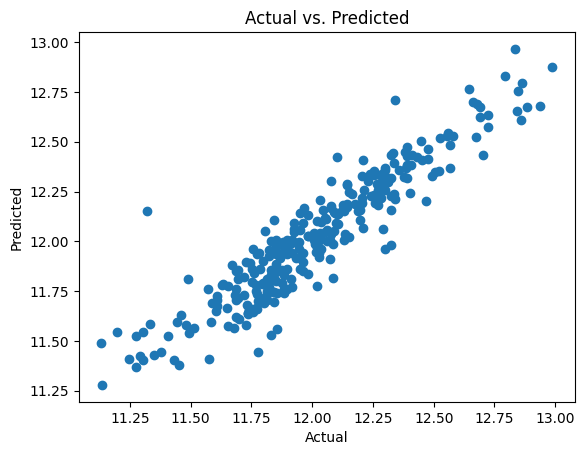

In [68]:
plt.scatter(y_test, y_predd)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.show()


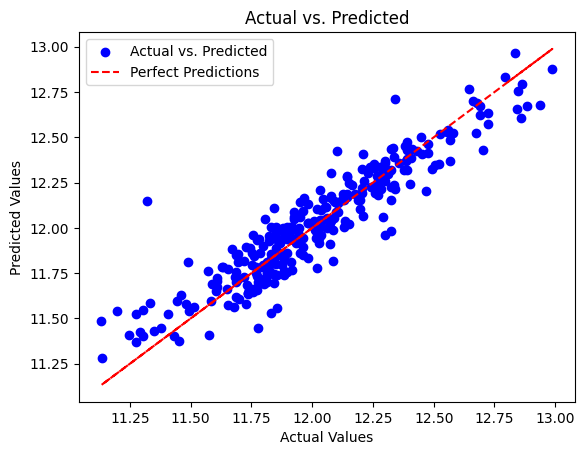

In [69]:
plt.scatter(y_test, y_predd, color='blue', label='Actual vs. Predicted')

plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Predictions')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')

plt.legend()
plt.show()